# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
from datetime import datetime
from scipy.stats import linregress
import json
import seaborn as sns; sns.set()

# Import the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90, high=90, size=1500)
lngs = np.random.uniform(low=-180, high=180, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 615


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&q={city}&units=metric"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | howrah
Processing Record 2 of Set 1 | kenai
Processing Record 3 of Set 1 | ulbroka
Processing Record 4 of Set 1 | alofi
Processing Record 5 of Set 1 | sidi akkacha
Processing Record 6 of Set 1 | grytviken
Processing Record 7 of Set 1 | blackmans bay
Processing Record 8 of Set 1 | enewetak
Processing Record 9 of Set 1 | adamstown
Processing Record 10 of Set 1 | tiksi
Processing Record 11 of Set 1 | port-aux-francais
Processing Record 12 of Set 1 | puerto carreno
Processing Record 13 of Set 1 | kermit
Processing Record 14 of Set 1 | yamada
Processing Record 15 of Set 1 | ushuaia
Processing Record 16 of Set 1 | bilibino
Processing Record 17 of Set 1 | jiexiu
Processing Record 18 of Set 1 | utrik
Processing Record 19 of Set 1 | fort st. john
Processing Record 20 of Set 1 | peniche
Processing Record 21 of Set 1 | brokopondo
Processing Record 22 of Set 1 | as sulayyil
Processing Record 23 of Set 1 | pr

Processing Record 40 of Set 4 | praia da vitoria
Processing Record 41 of Set 4 | vingt cinq
City not found. Skipping...
Processing Record 42 of Set 4 | manismata
Processing Record 43 of Set 4 | pago pago
Processing Record 44 of Set 4 | suai
City not found. Skipping...
Processing Record 45 of Set 4 | vernon
Processing Record 46 of Set 4 | jenison
Processing Record 47 of Set 4 | yacuiba
Processing Record 48 of Set 4 | pemangkat
Processing Record 49 of Set 4 | puerto ayora
Processing Record 0 of Set 5 | tchibanga
Processing Record 1 of Set 5 | mana
Processing Record 2 of Set 5 | brookings
Processing Record 3 of Set 5 | mount gambier
Processing Record 4 of Set 5 | mermoz boabab
Processing Record 5 of Set 5 | tanjung selor
City not found. Skipping...
Processing Record 6 of Set 5 | polyarnyy
Processing Record 7 of Set 5 | araguaina
Processing Record 8 of Set 5 | lock haven
Processing Record 9 of Set 5 | ad dabbah
Processing Record 10 of Set 5 | conceicao do mato dentro
Processing Record 11 o

Processing Record 27 of Set 8 | marion
Processing Record 28 of Set 8 | coari
Processing Record 29 of Set 8 | qarah bagh
Processing Record 30 of Set 8 | mascote
Processing Record 31 of Set 8 | nuku'alofa
Processing Record 32 of Set 8 | foggia
Processing Record 33 of Set 8 | hasaki
Processing Record 34 of Set 8 | shingu
Processing Record 35 of Set 8 | toliara
Processing Record 36 of Set 8 | mejit
Processing Record 37 of Set 8 | tshikapa
Processing Record 38 of Set 8 | crane
Processing Record 39 of Set 8 | northam
Processing Record 40 of Set 8 | yelizovo
Processing Record 41 of Set 8 | callao
Processing Record 42 of Set 8 | nar'yan-mar
Processing Record 43 of Set 8 | chinde
Processing Record 44 of Set 8 | muisne
Processing Record 45 of Set 8 | nguigmi
Processing Record 46 of Set 8 | sola
Processing Record 47 of Set 8 | demba
Processing Record 48 of Set 8 | palikir - national government center
Processing Record 49 of Set 8 | gizo
Processing Record 0 of Set 9 | socorro
Processing Record 1 o

Processing Record 18 of Set 12 | tumayr
Processing Record 19 of Set 12 | waingapu
Processing Record 20 of Set 12 | turpan
Processing Record 21 of Set 12 | namtsy
Processing Record 22 of Set 12 | puerto deseado
Processing Record 23 of Set 12 | belvedere marittimo
Processing Record 24 of Set 12 | gamba
Processing Record 25 of Set 12 | penzance
Processing Record 26 of Set 12 | mastacani
Processing Record 27 of Set 12 | murghob
Processing Record 28 of Set 12 | stephenville
Processing Record 29 of Set 12 | guerrero negro
Processing Record 30 of Set 12 | rabaul
Processing Record 31 of Set 12 | plainview
Processing Record 32 of Set 12 | darab
Processing Record 33 of Set 12 | saint-philippe
Processing Record 34 of Set 12 | elverum
Processing Record 35 of Set 12 | mossel bay
Processing Record 36 of Set 12 | port saint john's
Processing Record 37 of Set 12 | pontes e lacerda
Processing Record 38 of Set 12 | las terrenas
Processing Record 39 of Set 12 | laranjal paulista
Processing Record 40 of S

In [4]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data, columns=['City','Lat', 'Lng', 'Max Temp', 'Humidity', 'Cloudiness', 'Wind Speed', 'Country', 'Date'])

# Show Record Count
city_data_df.count()

City          585
Lat           585
Lng           585
Max Temp      585
Humidity      585
Cloudiness    585
Wind Speed    585
Country       585
Date          585
dtype: int64

In [5]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,howrah,22.5892,88.3103,22.00,78,6,3.09,IN,1703401418
1,kenai,60.5544,-151.2583,-0.48,100,100,10.29,US,1703401178
2,ulbroka,56.9411,24.2897,0.50,93,100,1.54,LV,1703401419
3,alofi,-19.0595,-169.9187,24.94,83,1,4.63,NU,1703401262
4,sidi akkacha,36.4647,1.3026,7.16,73,0,1.70,DZ,1703401420


In [6]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [7]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,22.00,78,6,3.09,IN,1703401418
1,kenai,60.5544,-151.2583,-0.48,100,100,10.29,US,1703401178
2,ulbroka,56.9411,24.2897,0.50,93,100,1.54,LV,1703401419
3,alofi,-19.0595,-169.9187,24.94,83,1,4.63,NU,1703401262
4,sidi akkacha,36.4647,1.3026,7.16,73,0,1.70,DZ,1703401420


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

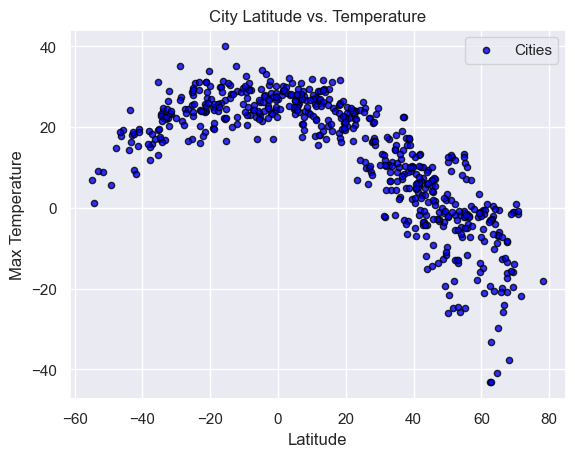

In [8]:
# Build scatter plot for latitude vs. temperature
city_data_df.plot.scatter(x='Lat', 
                          y='Max Temp', 
                          grid=True, 
                          edgecolor='black', 
                          color='blue',
                          linewidths=1, 
                          marker='o',
                          alpha=0.8, 
                          label ='Cities')
                          

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Max Temperature')
plt.title(f'City Latitude vs. Temperature')

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

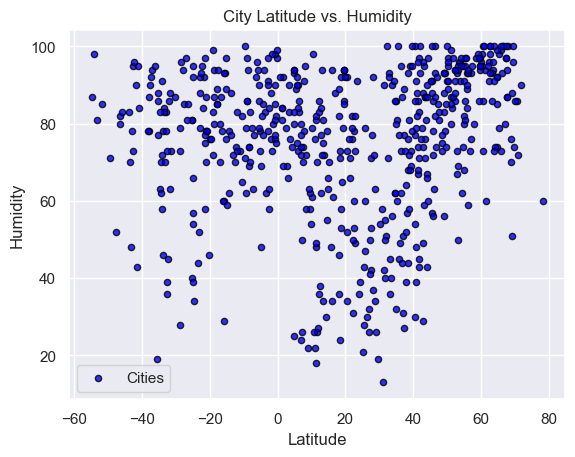

In [9]:
# Build the scatter plots for latitude vs. humidity
city_data_df.plot.scatter(x='Lat', 
                          y='Humidity', 
                          grid=True, 
                          edgecolor='black', 
                          color='blue',
                          linewidths=1, 
                          marker='o',
                          alpha=0.8, 
                          label ='Cities')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.title(f'City Latitude vs. Humidity')

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

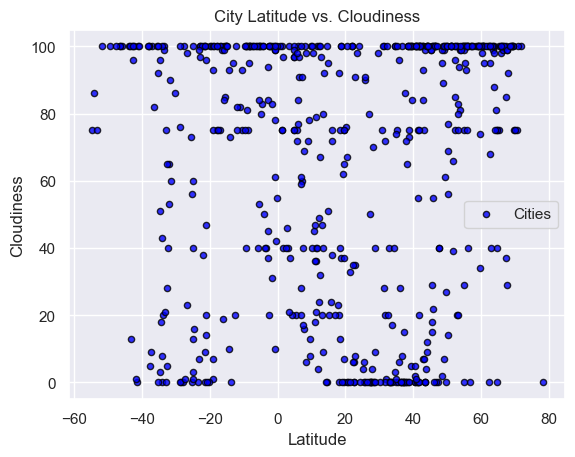

In [10]:
# Build the scatter plots for latitude vs. cloudiness
city_data_df.plot.scatter(x='Lat', 
                          y='Cloudiness', 
                          grid=True, 
                          edgecolor='black', 
                          color='blue',
                          linewidths=1, 
                          marker='o',
                          alpha=0.8, 
                          label ='Cities')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Cloudiness')

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

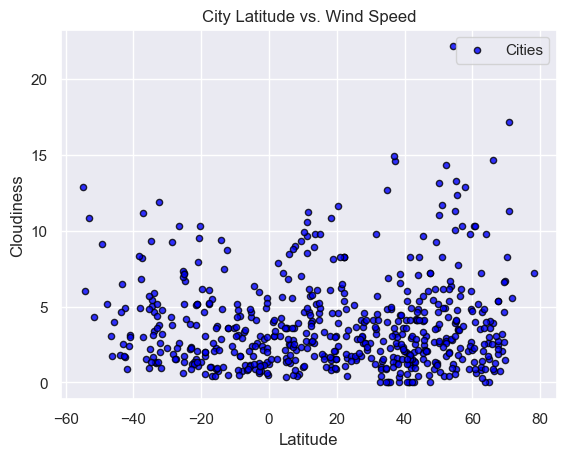

In [11]:
# Build the scatter plots for latitude vs. wind speed
city_data_df.plot.scatter(x='Lat', 
                          y='Wind Speed', 
                          grid=True, 
                          edgecolor='black', 
                          color='blue',
                          linewidths=1, 
                          marker='o',
                          alpha=0.8, 
                          label ='Cities')

# Incorporate the other graph properties
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.title(f'City Latitude vs. Wind Speed')

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [12]:
# Define a function to create Linear Regression plots

def LRp(x,y): 

    (slope, intercept, rvalue, pvalue, stderr) = linregress(x, y)
    line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
    regress_values = x * slope + intercept
    print(f'The r-value is: {rvalue}')
    plt.annotate(line_eq,(min(x),min(y)),fontsize=15,color="red")
    plt.scatter(x,y)
    plt.plot(x,regress_values,"r-")
    plt.xlabel('Latitude')
    plt.ylabel(y.name)
    
    plt.show()

In [13]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df[city_data_df['Lat']>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,howrah,22.5892,88.3103,22.00,78,6,3.09,IN,1703401418
1,kenai,60.5544,-151.2583,-0.48,100,100,10.29,US,1703401178
2,ulbroka,56.9411,24.2897,0.50,93,100,1.54,LV,1703401419
4,sidi akkacha,36.4647,1.3026,7.16,73,0,1.70,DZ,1703401420
7,enewetak,11.3474,162.3373,27.43,81,40,11.19,MH,1703401146


In [14]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df[city_data_df['Lat']<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
3,alofi,-19.0595,-169.9187,24.94,83,1,4.63,NU,1703401262
5,grytviken,-54.2811,-36.5092,1.33,98,86,6.01,GS,1703401130
6,blackmans bay,-43.0167,147.3167,18.07,78,100,2.52,AU,1703401135
8,adamstown,-25.0660,-130.1015,22.81,95,100,7.23,PN,1703401127
10,port-aux-francais,-49.3500,70.2167,5.75,71,100,9.13,TF,1703401134


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.8601128413617124


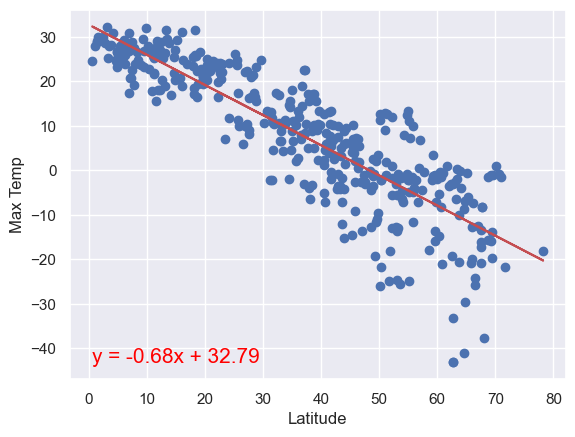

In [15]:
# Linear regression on Northern Hemisphere
LRp(northern_hemi_df['Lat'],northern_hemi_df['Max Temp'])

The r-value is: 0.6005558452452505


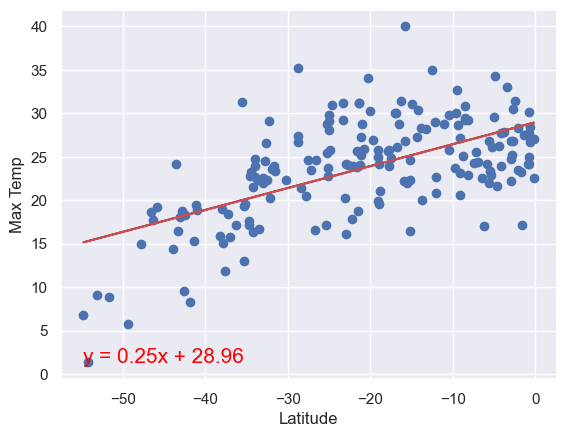

In [16]:
# Linear regression on Southern Hemisphere
LRp(southern_hemi_df['Lat'],southern_hemi_df['Max Temp'])

**Discussion about the linear relationship**:

There is a strong correlation between max temp and latitude on Northern Hemisphere.

There is a moderate correlation between max temp and latitude on Southern Hemisphere

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.3793530404793893


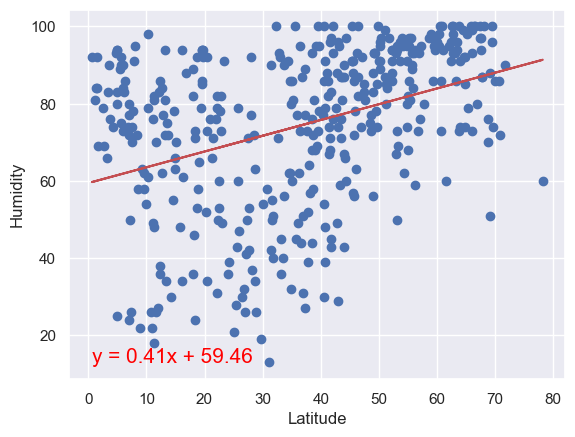

In [17]:
# Northern Hemisphere
LRp(northern_hemi_df['Lat'],northern_hemi_df['Humidity'])

The r-value is: 0.11100141388054442


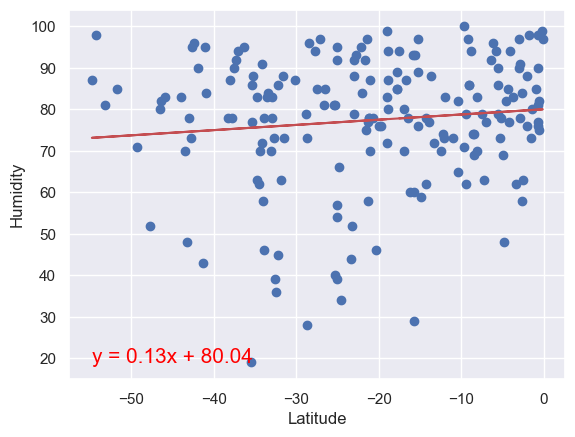

In [18]:
# Southern Hemisphere
LRp(southern_hemi_df['Lat'],southern_hemi_df['Humidity'])

**Discussion about the linear relationship:** 

There is a weak correlation between humidity and latitude on Northern Hemisphere.

There is no correlation between humidity and latitude on Southern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.2679639567260185


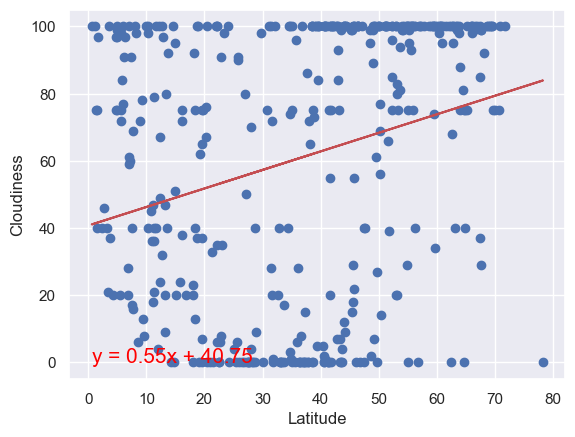

In [19]:
# Northern Hemisphere
LRp(northern_hemi_df['Lat'],northern_hemi_df['Cloudiness'])

The r-value is: 0.12739824712624687


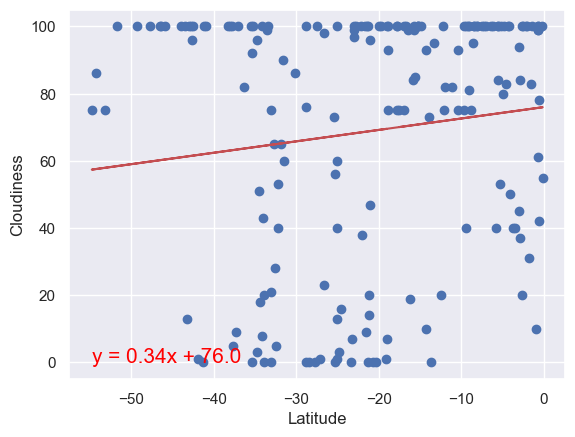

In [20]:
# Southern Hemisphere
LRp(southern_hemi_df['Lat'],southern_hemi_df['Cloudiness'])

**Discussion about the linear relationship:** 

There is no correlation between Cloudiness and Latitude on Northern Hemisphere or on Southern Hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: 0.048139323216569024


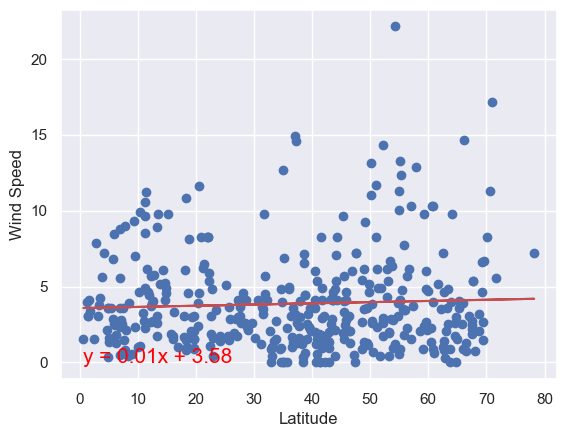

In [21]:
# Northern Hemisphere
LRp(northern_hemi_df['Lat'],northern_hemi_df['Wind Speed'])

The r-value is: -0.32307574218892665


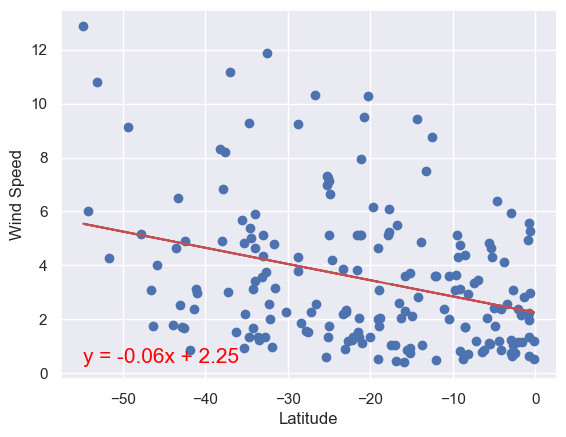

In [22]:
# Southern Hemisphere
LRp(southern_hemi_df['Lat'],southern_hemi_df['Wind Speed'])

**Discussion about the linear relationship:** 

There is no correlation between Wind Speed and latitude on Northern Hemisphere.

There is a weak correlation between Wind Speed and latitude on Southern Hemisphere.